# Redução de Dimensionalidade Aula 2

**Resumo da ultima aula**
Em estatística e machine learning, cada variável (feature) de um dataset representa uma dimensão no espaço.
Exemplo: um dataset com 100 variáveis → cada registro é um ponto em um espaço de 100 dimensões.
Redução de dimensionalidade = projetar os dados em um espaço com menos dimensões, preservando máximo de informação (variância, estrutura, padrões).



**Exemplos**

Imagine que você quer descrever uma pessoa.

Se usar muitas variáveis: altura, peso, idade, cor dos olhos, estilo musical, número de horas dormidas, quantidade de café por dia, etc... você tem um espaço com muitas dimensões.
Mas nem todas essas variáveis são essenciais para entender diferenças entre pessoas.




Uma loja coleta dados de clientes: altura, peso, idade, tamanho do pé, largura do ombro, medida da cintura, etc.
Muitos desses atributos estão correlacionados (pessoas altas geralmente têm pés maiores).
O algoritmo percebe isso e cria um fator resumido como “tamanho corporal” → que substitui várias medidas.
Resultado: em vez de analisar 10 medidas diferentes, você analisa só 2 fatores principais (ex.: “tamanho corporal” e “idade”).




**Como isso é feito?**
PCA: pega combinações matemáticas das variáveis para encontrar “resumos” que explicam melhor as diferenças.

Como juntar altura e peso em um único “fator tamanho”.

t-SNE / UMAP: pegam dados complexos e “espalham” em 2D ou 3D, preservando vizinhança (quem é parecido fica perto no gráfico).



**Por que às vezes reduzimos para 2 dimensões?**

Visualização!

Humanos só conseguem interpretar 2D (gráficos de dispersão) e 3D (plots interativos).
Então, reduzir para 2D ajuda a enxergar clusters, separações e padrões.
Exemplo: PCA com n_components=2 → projetar dados em PC1 x PC2.

Comunicação de resultados
Mostrar clientes, gestores ou colegas insights visuais → é mais intuitivo em 2D.

**Por que em alguns casos mantemos mais dimensões (3, 5, 10...)?**

Porque o objetivo não é visualização, mas análise ou modelagem.

Exemplo:

Dataset com 100 features.
PCA mostra que com 10 componentes já capturamos 95% da variância.
Então podemos trabalhar com 10 dimensões (em vez de 100) → reduzindo ruído, redundância, custo computacional.

Aqui, não necessariamente reduzimos para 2, mas para um número ótimo de PCs que preserva informação suficiente.

**Interpretação prática**

Se você roda PCA e vê:


*   PC1 = 45% da variância
*   PC2 = 25% da variância
*   PC3 = 15% da variância
*   … até PC10 chegando em 95% acumulado



Você pode:

Para exploração visual → usar PC1 e PC2 num gráfico.
Para modelagem → usar PC1 até PC10 como features, em vez das originais.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap

## **Analise Exploratória**

In [3]:
df = pd.read_csv('train.csv')
print("Tamanho do dataset", df.shape)

Tamanho do dataset (2000, 21)


In [4]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


#### **Pipeline de dados**

In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cat = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Numericas", num_cols)
print("categoricas", num_cat)


Numericas ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
categoricas []


In [8]:
# criação de pipelines Imput, codificador e scale

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, num_cat)
])

# aplicar pre-processamento
X = preprocessor.fit_transform(df)
print('Shape após preprocessing', X.shape)

Shape após preprocessing (2000, 21)


### **PCA**

In [10]:
# Rodar PCA e analisar a variancia explicada
pca = PCA(n_components=min(50, X.shape[1]))
pca.fit(X)

PCA(n_components=21)

In [11]:
# Armazenar a variância explicada
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

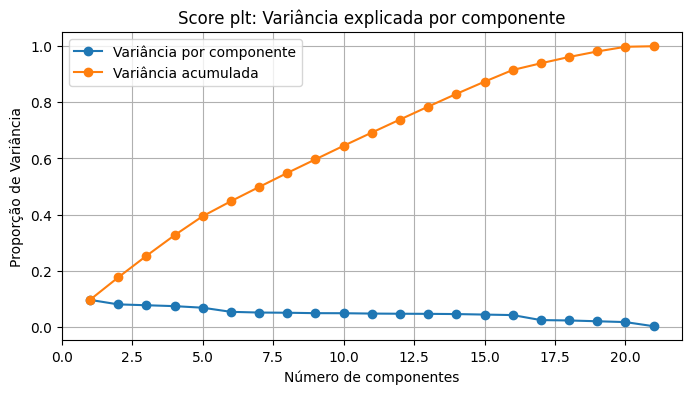

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, len(explained)+1), explained, marker='o', label='Variância por componente')
plt.plot(np.arange(1, len(cumulative)+1), cumulative, marker='o', label='Variância acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Proporção de Variância')
plt.legend()
plt.grid(True)
plt.title("Score plt: Variância explicada por componente")
plt.show()

In [14]:
n_components_90 = np.searchsorted(cumulative, 0.9) + 1
n_components_95 = np.searchsorted(cumulative, 0.95) + 1

print("Componentes que explicam 90%", n_components_90)
print("Componentes que explicam 95%", n_components_95)

Componentes que explicam 90% 16
Componentes que explicam 95% 18


In [15]:
c_comp = min(n_components_90, 20) #top 20
X_pca = PCA(n_components=c_comp).fit_transform(X)
print("Shape após PCA", X_pca.shape)

Shape após PCA (2000, 16)


In [17]:
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot'] if len(num_cat) > 0 else None

ohe_cols = []
if ohe is not None:
    cat_names = ohe.get_feature_names_out(num_cat)
    ohe_cols = list(cat_names)
feature_names  = list(num_cols) + ohe_cols

pca_full = PCA(n_components=c_comp).fit(X)
loadings = pca_full.components_.T
loadings_df = pd.DataFrame(loadings, index=feature_names, columns=[f'PC{i+1}' for i in range(c_comp)])

for pc in [f'PC{i+1}' for i in range(min(3, c_comp))]:
    display(loadings_df[pc].abs().sort_values(ascending=False).head(10))

,PC1
price_range,0.673598
ram,0.620746
px_width,0.223713
px_height,0.208553
battery_power,0.134654
sc_w,0.113435
sc_h,0.100620
pc,0.083913
fc,0.073820
int_memory,0.051911


,PC2
fc,0.595926
pc,0.595532
sc_w,0.259625
sc_h,0.243012
four_g,0.231860
three_g,0.213368
px_height,0.141130
px_width,0.127588
battery_power,0.082299
int_memory,0.071347


,PC3
three_g,0.612803
four_g,0.607755
pc,0.268312
fc,0.267226
px_height,0.151430
sc_w,0.150762
sc_h,0.144811
px_width,0.124826
talk_time,0.094073
clock_speed,0.092255


# **Exercício de hoje**

Identifique a quantidade de componentes necessários para explicar 90 e 95% da variância do dataset car_pricing que esta no portal.